In [ ]:
# PYPM3 documentation
#https://people.duke.edu/~ccc14/sta-663/PyMC3.html

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pymc3 as pm

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pymc3 as pm

## Import libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
from matplotlib import transforms
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FixedLocator, FixedFormatter


# Chapter 2

#### Code 2.1: calculate and show a simple probability density
ways is the number of ways you can pull one red ball from a bag of 4 balls given that the number of red balls is [0,1,2,3,4]

In [5]:
red_balls = [0,1,2,3,4]
ways = np.array ( [0,3,8,9,0])
posterior = ways / ways.sum (axis=0)   # which of course add to 1
posterior

array([0.  , 0.15, 0.4 , 0.45, 0.  ])

Text(0.5, 1.0, 'probability of taking out a red ball from a bag of 4 balls')

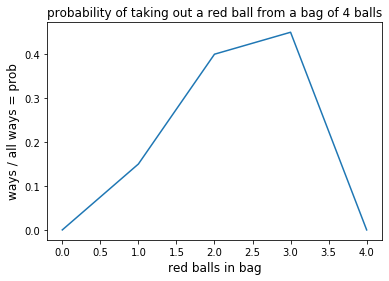

In [3]:
plt.plot (red_balls, posterior )
plt.xlabel ("red balls in bag", fontsize=12)
plt.ylabel ("ways / all ways = prob", fontsize=12)
plt.title ( "probability of taking out a red ball from a bag of {} balls".format(4) )

#### Code 2.2 Pull out the density from the binomial model
p (successes=3 | p=0.5, n=10)

In [39]:
stats.binom.pmf ( k=3, p=0.5, n=10)

0.1171875

#### Code 2.3 Grid search across p values fit to an experiment giving a posterior
Prior is fixed\
Experiment is r successes from n trials\
Make a function so that r and n and the grid size can be varied.\
The grid is all of the possible values of theta in sequence\
We don't know theta; given the evidence of r success from n trials, we'd like to see the relative plausibility of each theta in the grid.

In [93]:
np.repeat ( 5, 10)


array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [94]:
def posterior_grid_search ( grid_points = 5, r = 6, n = 9):

    # define the grid
    p_grid  = np.linspace  (0,1,grid_points)
    # defin the prior
    prior = np.repeat ( 1, grid_points)
    # apply likelihood function to grid
    likelihood = stats.binom.pmf ( k=r, n=n, p=p_grid)

    unstd_post = likelihood * prior
    return  p_grid, unstd_post / unstd_post.sum()


#### Code 2.4 Now plot the result 

In [66]:
# define colors
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
BLUE5, BLUE6 = '#92CDDD', '#2E869D'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1, ORANGE2, ORANGE3 = '#F79747', '#FAC090', '#F36721'

In [299]:
# configure plot font family to Arial
plt.rcParams['font.family'] = 'Arial'
# configure mathtext bold and italic font family to Arial
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'

No handles with labels found to put in legend.


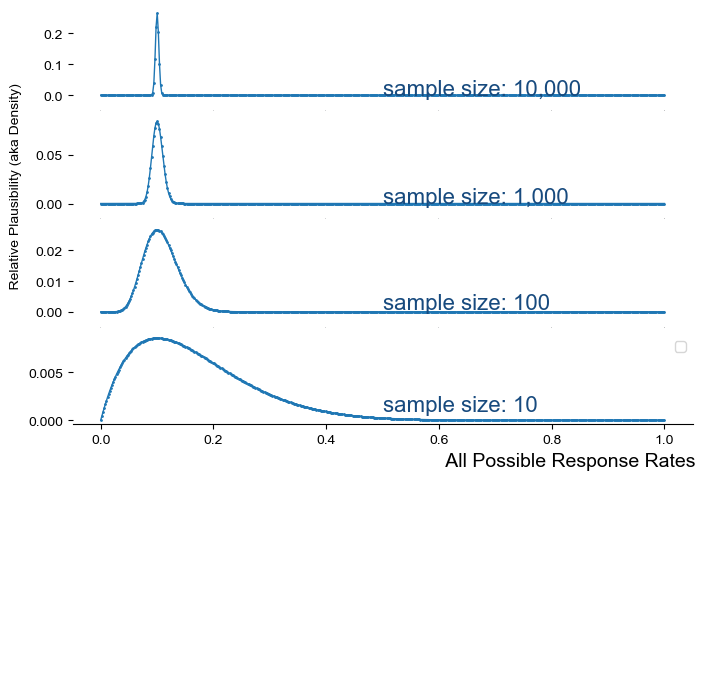

In [300]:
import seaborn as sns

rr = 0.1

fig, axs = plt.subplots(4 ,figsize=(8, 5.5), dpi=100 ) 


fig.suptitle('')
# create new figure

plt.ylabel (' '*100 + 'Relative Plausibility (aka Density)' )


points = 500
n = 10000
r = n * rr
p_grid, posterior =   posterior_grid_search ( points, r, n)
axs[0].plot (p_grid,posterior  , 'o-', linewidth=1, ms=1)
axs[0].tick_params (axis='x', width=0 ,labelsize=0, colors=GRAY5)
axs[0].text ( 0.5, 0.001,  'sample size: 10,000 ', color=BLUE1, fontsize=16 )

n = 1000
r = n * rr
p_grid, posterior =   posterior_grid_search ( points, r, n)
#plt.plot (p_grid,posterior, 'o-', label='Successes={}, n={}'.format (r,n)   )
axs[1].plot (p_grid,posterior  , 'o-', linewidth=1, ms=1)
axs[1].subtitle = 'With  samples' #.format ( {0} )
axs[1].tick_params (axis='x', width=0 ,labelsize=0, colors=GRAY5)
axs[1].text ( 0.5, 0.001,  'sample size: 1,000 ', color=BLUE1, fontsize=16 )

sns.despine (bottom=True, left=True)

n = 100
r = n * rr
p_grid, posterior =   posterior_grid_search ( points, r, n)
axs[2].plot (p_grid,posterior  , 'o-', linewidth=1, ms=1)
axs[2].tick_params (axis='x', width=0 ,labelsize=0, colors=GRAY5)
axs[2].text ( 0.5, 0.001,  'sample size: 100 ', color=BLUE1, fontsize=16 )

n = 10
r = n * rr
p_grid, posterior =   posterior_grid_search ( points, r, n)
axs[3].plot (p_grid,posterior  , 'o-', linewidth=1, ms=1)
axs[3].spines['bottom'].set_visible(True)
axs[3].text ( 0.5, 0.001,  'sample size: 10 ', color=BLUE1, fontsize=16 )

plt.xlabel (' '* 70 + 'All Possible Response Rates', fontsize=14)
plt.legend ( loc=0)


#### Try and forecast based on the above 
E.g. if we do a campaign with 1,000 people how many responses will we get

#### First thing is to sample the probabilities out of the distributions
Note that here we're finding the posterior distribution from a sample of 100 people.

(array([ 13.,  46., 158., 234., 266., 164.,  84.,  30.,   3.,   2.]),
 array([0.0950951 , 0.12152152, 0.14794795, 0.17437437, 0.2008008 ,
        0.22722723, 0.25365365, 0.28008008, 0.30650651, 0.33293293,
        0.35935936]),
 <a list of 10 Patch objects>)

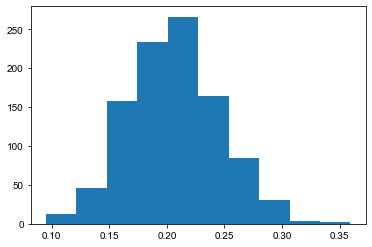

In [442]:
points = 1000
n = 100
r = 0.2* n
p_grid, posterior =   posterior_grid_search ( points, r, n)
# Sample from the posterior distribution using the likelihood of each probability
lst_sampled_probabilities =  np.array (random.choices(p_grid, weights= posterior, k=points))
plt.hist (lst_sampled_probabilities)

#### Then, multiple the new campign number by the sampled probabilities

(array([0.00055961, 0.00130575, 0.00391724, 0.00609349, 0.00727488,
        0.00945112, 0.00963766, 0.00858062, 0.00584477, 0.0040416 ,
        0.00279803, 0.00161664, 0.00049743, 0.00037307, 0.00018654]),
 array([102.1021021 , 118.18485152, 134.26760093, 150.35035035,
        166.43309977, 182.51584918, 198.5985986 , 214.68134801,
        230.76409743, 246.84684685, 262.92959626, 279.01234568,
        295.0950951 , 311.17784451, 327.26059393, 343.34334334]),
 <a list of 15 Patch objects>)

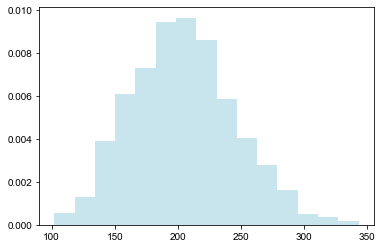

In [436]:
campaign_size = 1000
predicted_posterior = campaign_size * np.array (lst_sampled_probabilities)
plt.hist (predicted_posterior, bins=15, density = True, color = BLUE5,alpha=0.5 )

In [430]:
len (predicted_posterior)

100

#### Now try to figure out the sampling distribution for if just the maximum likelihood had been used

(array([0.00055961, 0.00130575, 0.00391724, 0.00609349, 0.00727488,
        0.00945112, 0.00963766, 0.00858062, 0.00584477, 0.0040416 ,
        0.00279803, 0.00161664, 0.00049743, 0.00037307, 0.00018654]),
 array([102.1021021 , 118.18485152, 134.26760093, 150.35035035,
        166.43309977, 182.51584918, 198.5985986 , 214.68134801,
        230.76409743, 246.84684685, 262.92959626, 279.01234568,
        295.0950951 , 311.17784451, 327.26059393, 343.34334334]),
 <a list of 15 Patch objects>)

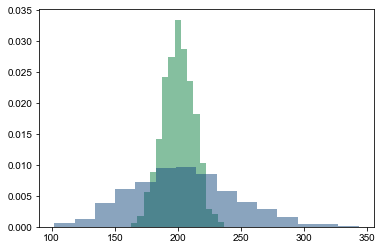

In [437]:
# fixing to a 20% chance of having a response find the sampling distribution for the campaign

r_grid = list ( range ( 100, 300, 1) )
p = 0.2
ML_probs = stats.binom.pmf ( k=r_grid, n=campaign_size, p=p)

# Now sample from this distribution as before...
lst_sampled_probabilities_MLE =  np.array (random.choices(r_grid, weights= ML_probs, k=1000))
#plt.hist (lst_sampled_probabilities_MLE)

# Show the two histograms together.
plt.hist (lst_sampled_probabilities_MLE, bins=15, density = True, color = GREEN1,alpha=0.5 )
plt.hist (predicted_posterior, bins=15, density = True, color = BLUE1,alpha=0.5 )


#### Repeat all of this for the case where n = 1000

(array([  4.,  14.,  63., 174., 270., 217., 173.,  60.,  21.,   4.]),
 array([0.15915916, 0.16746747, 0.17577578, 0.18408408, 0.19239239,
        0.2007007 , 0.20900901, 0.21731732, 0.22562563, 0.23393393,
        0.24224224]),
 <a list of 10 Patch objects>)

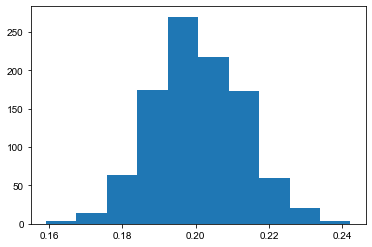

In [438]:
points = 1000
n = 1000
r = 0.2* n
p_grid, posterior =   posterior_grid_search ( points, r, n)
# Sample from the posterior distribution using the likelihood of each probability
lst_sampled_probabilities =  np.array (random.choices(p_grid, weights= posterior, k=points))
plt.hist (lst_sampled_probabilities)

(array([0.00054163, 0.00090271, 0.00180542, 0.00776331, 0.01191578,
        0.0231094 , 0.02726187, 0.03646952, 0.02419265, 0.02274831,
        0.01245741, 0.0068606 , 0.00252759, 0.00144434, 0.00054163]),
 array([159.15915916, 164.69803136, 170.23690357, 175.77577578,
        181.31464798, 186.85352019, 192.39239239, 197.9312646 ,
        203.4701368 , 209.00900901, 214.54788121, 220.08675342,
        225.62562563, 231.16449783, 236.70337004, 242.24224224]),
 <a list of 15 Patch objects>)

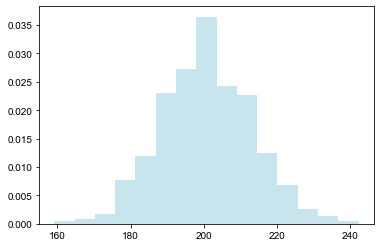

In [439]:
campaign_size = 1000
predicted_posterior = campaign_size * np.array (lst_sampled_probabilities)
plt.hist (predicted_posterior, bins=15, density = True, color = BLUE5,alpha=0.5 )

#### Repeat all of this for the case where n = 1000

(array([  5.,  20., 105., 127., 272., 205., 190.,  51.,  21.,   4.]),
 array([0.18818819, 0.19069069, 0.19319319, 0.1956957 , 0.1981982 ,
        0.2007007 , 0.2032032 , 0.20570571, 0.20820821, 0.21071071,
        0.21321321]),
 <a list of 10 Patch objects>)

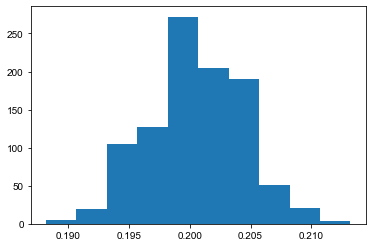

In [458]:
points = 1000
n = 10000
r = 0.2* n
p_grid, posterior =   posterior_grid_search ( points, r, n)
# Sample from the posterior distribution using the likelihood of each probability
lst_sampled_probabilities =  np.array (random.choices(p_grid, weights= posterior, k=points))
plt.hist (lst_sampled_probabilities)

(array([0.00561937, 0.05057438, 0.        , 0.22102875, 0.        ,
        0.47015438, 0.        , 0.5994    , 0.        , 0.38586375,
        0.        , 0.104895  , 0.        , 0.03371625, 0.00187312]),
 array([196.1961962, 196.7300634, 197.2639306, 197.7977978, 198.331665 ,
        198.8655322, 199.3993994, 199.9332666, 200.4671338, 201.001001 ,
        201.5348682, 202.0687354, 202.6026026, 203.1364698, 203.670337 ,
        204.2042042]),
 <a list of 15 Patch objects>)

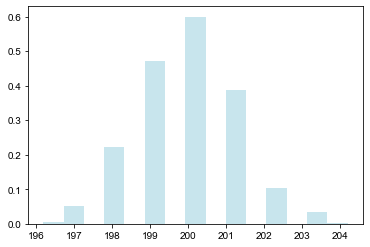

In [456]:
campaign_size = 1000
predicted_posterior = campaign_size * np.array (lst_sampled_probabilities)
plt.hist (predicted_posterior, bins=15, density = True, color = BLUE5,alpha=0.5 )

(array([0.00561937, 0.05057438, 0.        , 0.22102875, 0.        ,
        0.47015438, 0.        , 0.5994    , 0.        , 0.38586375,
        0.        , 0.104895  , 0.        , 0.03371625, 0.00187312]),
 array([196.1961962, 196.7300634, 197.2639306, 197.7977978, 198.331665 ,
        198.8655322, 199.3993994, 199.9332666, 200.4671338, 201.001001 ,
        201.5348682, 202.0687354, 202.6026026, 203.1364698, 203.670337 ,
        204.2042042]),
 <a list of 15 Patch objects>)

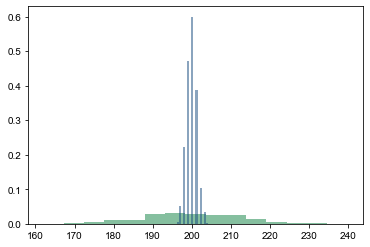

In [457]:
# fixing to a 20% chance of having a response find the sampling distribution for the campaign

r_grid = list ( range ( 100, 300, 1) )
p = 0.2
ML_probs = stats.binom.pmf ( k=r_grid, n=campaign_size, p=p)

# Now sample from this distribution as before...
lst_sampled_probabilities_MLE =  np.array (random.choices(r_grid, weights= ML_probs, k=1000))
#plt.hist (lst_sampled_probabilities_MLE)

# Show the two histograms together.
plt.hist (lst_sampled_probabilities_MLE, bins=15, density = True, color = GREEN1,alpha=0.5 )
plt.hist (predicted_posterior, bins=15, density = True, color = BLUE1,alpha=0.5 )


#### So if your campaign is 1000 people, you should be able to get a good feel for the responses (if sampling is the same)

#### End of my detour

#### Repeat the above the conventional way

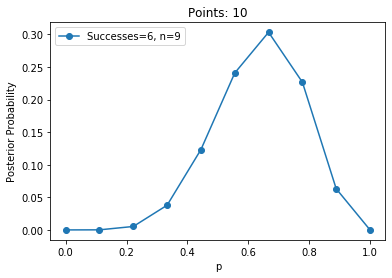

In [102]:
points = 10
r, n = 6, 9
p_grid, posterior =   posterior_grid_search ( points, r, n)
plt.plot (p_grid,posterior, 'o-', label='Successes={}, n={}'.format (r,n)   )
plt.title ('Points: {}'.format (points) )
plt.ylabel ( 'Posterior Probability')
plt.xlabel ('p')
plt.legend ( loc=0)

#### Code 2.6 Compute the posterior with quadratic approximation

In [ ]:
df compute_QAP ()

data = np.repeat((0, 1), (3, 6))

with pm.Model() as normal_aproximation:
    p = pm.Uniform('p', 0, 1)
    w = pm.Binomial('w', n=len(data), p=p, observed=data.sum())
    mean_q = pm.find_MAP()
    std_q = ((1/pm.find_hessian(mean_q, vars=[p]))**0.5)[0]
mean_q['p'], std_q

In [49]:
data = np.repeat((0, 1), (3, 6))
data

array([0, 0, 0, 1, 1, 1, 1, 1, 1])

In [32]:
data = np.repeat((0, 1), (3, 6))
with pm.Model() as normal_approximation:
    p = pm.Uniform('p', 0, 1)
    w = pm.Binomial('w', n=len(data), p=p, observed=data.sum())
    mean_q = pm.find_MAP()
    std_q = ((1/pm.find_hessian(mean_q, vars=[p]))**0.5)[0]

mean_q['p'], std_q

(array(0.66666667), array([0.15713484]))

In [11]:
w, n = 6, 9
x = np.linspace(0, 1, 100)
stats.beta.pdf(x , w+1, n-w+1)

array([0.00000000e+00, 8.65447568e-10, 5.37103165e-08, 5.93067004e-07,
       3.22918777e-06, 1.19334528e-05, 3.45079280e-05, 8.42392045e-05,
       1.81646332e-04, 3.56241999e-04, 6.48235117e-04, 1.11011165e-03,
       1.80803889e-03, 2.82304631e-03, 4.25194390e-03, 6.20794624e-03,
       8.82097737e-03, 1.22376385e-02, 1.66208267e-02, 2.21489989e-02,
       2.90150807e-02, 3.74250260e-02, 4.75960372e-02, 5.97544602e-02,
       7.41333755e-02, 9.09699060e-02, 1.10502271e-01, 1.32966614e-01,
       1.58593641e-01, 1.87605101e-01, 2.20210151e-01, 2.56601645e-01,
       2.96952382e-01, 3.41411370e-01, 3.90100141e-01, 4.43109155e-01,
       5.00494360e-01, 5.62273930e-01, 6.28425240e-01, 6.98882117e-01,
       7.73532415e-01, 8.52215945e-01, 9.34722817e-01, 1.02079221e+00,
       1.11011165e+00, 1.20231675e+00, 1.29699151e+00, 1.39366924e+00,
       1.49183395e+00, 1.59092251e+00, 1.69032728e+00, 1.78939947e+00,
       1.88745311e+00, 1.98376968e+00, 2.07760334e+00, 2.16818683e+00,
      

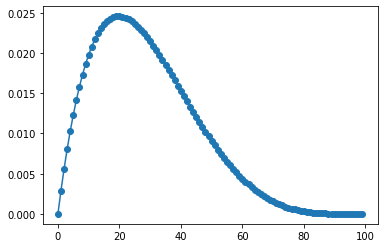

In [12]:
np.linspace(0, 1, 100)
sum ( stats.beta.pdf(x , w+1, n-w+1))
plt.plot ( np.arange (  100 ), stats.beta.pdf(x , 2, 5)/ 100  , 'o-' )
